<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_2_Increasing_CNN_Depth_and_Its_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Impact of Depth on Feature Learning


- Increasing the depth of a CNN allows the network to capture more complex patterns in the data. The depth of a CNN is crucial because it determines the network’s capacity to learn hierarchical representations of input data.
- As we stack more layers, the network learns progressively more abstract features, which can significantly improve its performance on tasks such as object recognition and image classification.



## 1.1 Hierarchical Feature Learning in CNNs


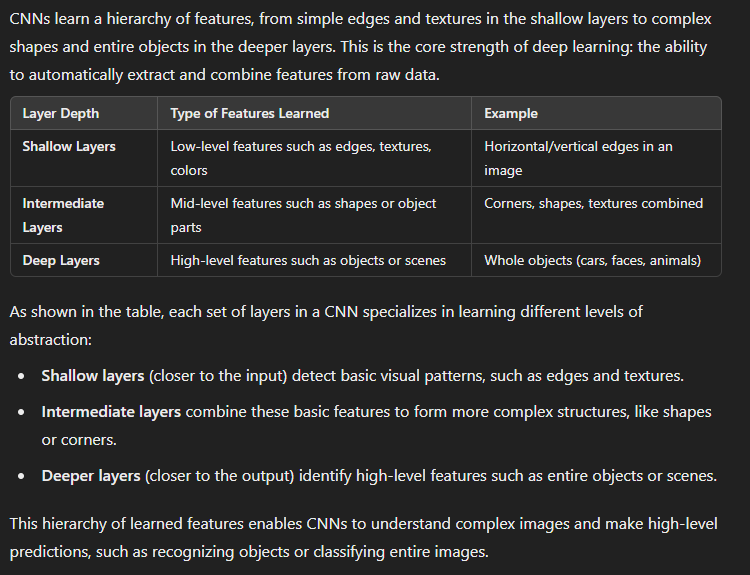

## 1.2 How Depth Enhances Feature Learning


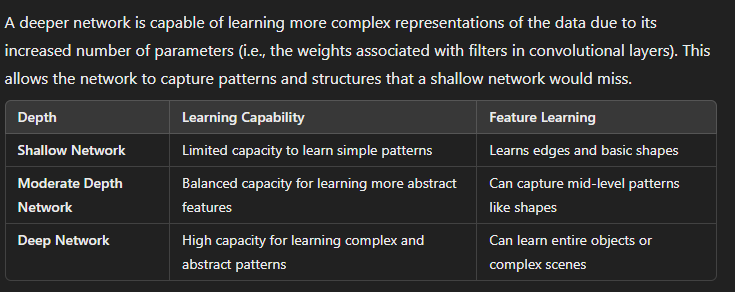

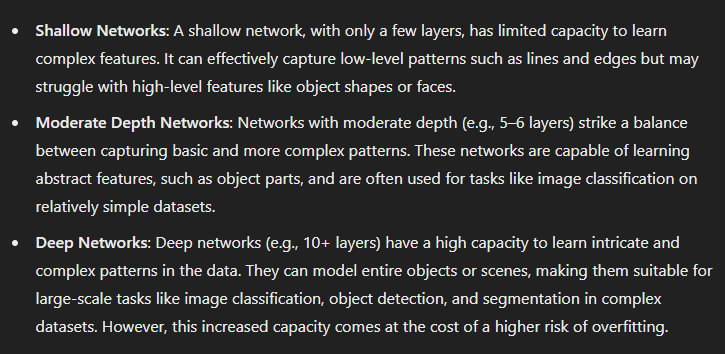

## 1.3 Balancing Depth and Generalization


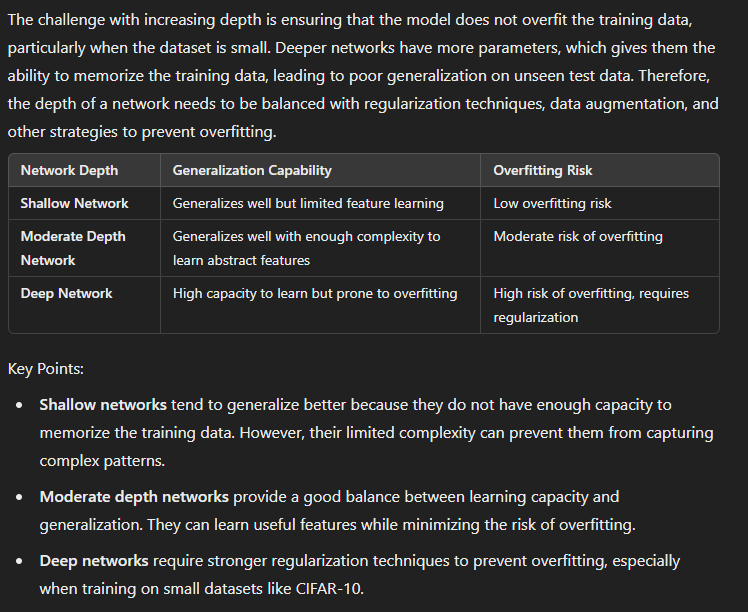

# Section 2: Experiment - Varying CNN Depth


This section presents an experiment to investigate how varying the depth of a Convolutional Neural Network (CNN) affects its performance, particularly on small datasets like CIFAR-10. By adjusting the number of convolutional layers, we can evaluate the trade-off between model complexity, learning capability, and overfitting. The goal is to observe how increasing the depth impacts the model's ability to learn complex features and whether it generalizes well to unseen data.



## 2.1 Experimental Setup


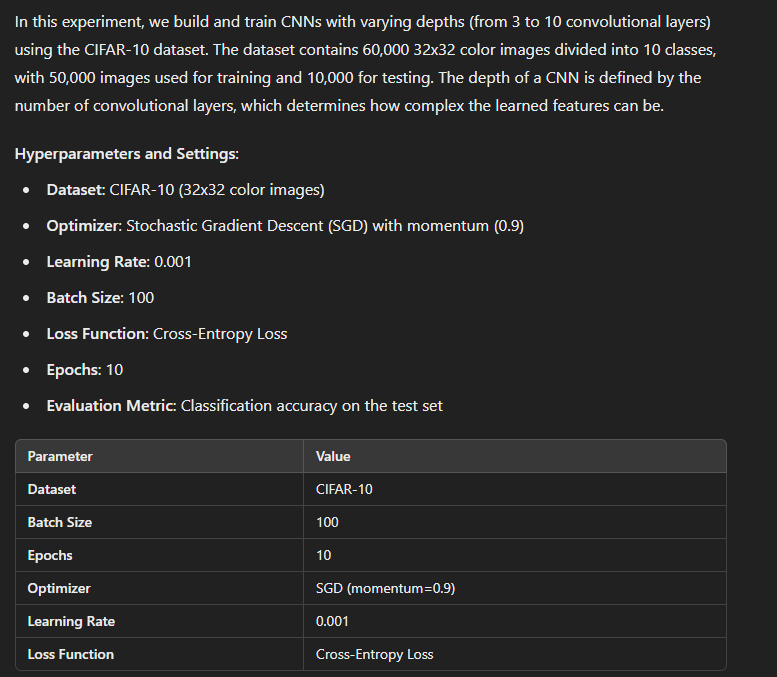

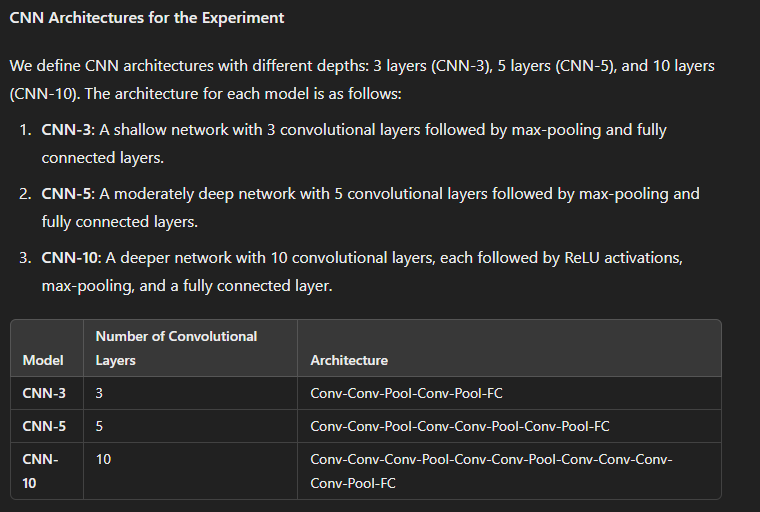

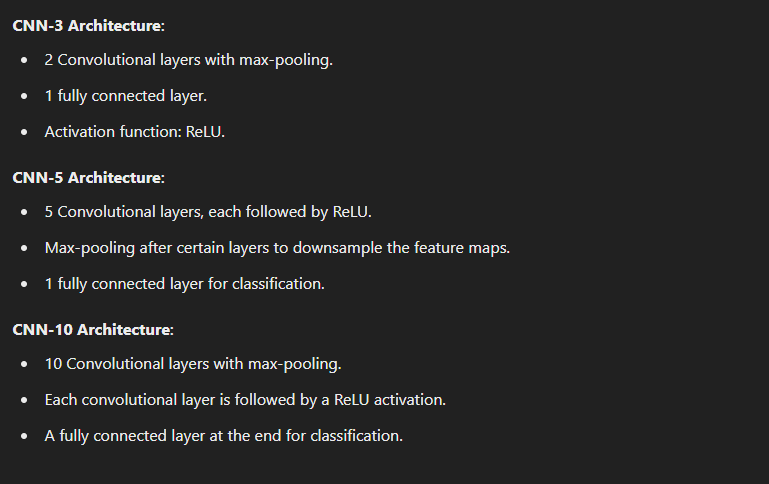

## 2.2 Experiments

In [1]:
# Setup: Importing Required Libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [2]:
# Data Preprocessing and Loading


# Data transformations including normalization and data augmentation (random flip and crop)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),   # Random horizontal flip
    transforms.RandomCrop(32, padding=4),  # Random crop with padding
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# DataLoader for batching
trainloader = DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:01<00:00, 99465472.56it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Defining CNN Architectures with Varying Depth


##### 1. CNN with 3 Layers


In [3]:
class CNN3Layers(nn.Module):
    def __init__(self):
        super(CNN3Layers, self).__init__()
        # 1st Convolutional Layer (3x3 kernel, 32 filters)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 2nd Convolutional Layer (64 filters)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 3rd Convolutional Layer (128 filters)

        # Pooling layer (MaxPooling)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Linear layer
        self.fc2 = nn.Linear(256, 10)  # Output layer (10 classes for CIFAR-10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 1st conv + ReLU + Pooling
        x = self.pool(F.relu(self.conv2(x)))  # 2nd conv + ReLU + Pooling
        x = self.pool(F.relu(self.conv3(x)))  # 3rd conv + ReLU + Pooling

        x = x.view(-1, 128 * 4 * 4)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x


##### 2. CNN with 5 Layers


In [12]:
class CNN5Layers(nn.Module):
    def __init__(self):
        super(CNN5Layers, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Use a placeholder input tensor to calculate the size of the fully connected layer input
        # We will pass a dummy tensor through the convolutional layers to determine the output size.
        self._to_linear = None
        self.convs(torch.randn(1, 3, 32, 32))  # Dummy input to calculate flattened size

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 10)

    def convs(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))

        if self._to_linear is None:
            self._to_linear = x.view(-1).shape[0]  # Automatically calculate the flattened size
        return x

    def forward(self, x):
        x = self.convs(x)  # Pass through convolutional layers
        x = x.view(-1, self._to_linear)  # Flatten the output for the fully connected layer
        x = F.relu(self.fc1(x))  # First fully connected layer
        x = self.fc2(x)  # Output layer
        return x


##### 3. CNN with 10 Layers


In [18]:
class CNN10Layers(nn.Module):
    def __init__(self):
        super(CNN10Layers, self).__init__()
        # 10 convolutional layers with padding and fewer pooling layers to avoid dimension shrinking
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        # Use fewer pooling layers to prevent shrinking to zero
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Use global average pooling instead of max pooling in the later layers to preserve dimensions
        self.global_pool = nn.AdaptiveAvgPool2d((2, 2))

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 1st pooling
        x = self.pool(F.relu(self.conv2(x)))  # 2nd pooling

        x = F.relu(self.conv3(x))  # No pooling
        x = F.relu(self.conv4(x))  # No pooling

        x = self.pool(F.relu(self.conv5(x)))  # 3rd pooling
        x = F.relu(self.conv6(x))  # No pooling

        x = self.pool(F.relu(self.conv7(x)))  # 4th pooling
        x = F.relu(self.conv8(x))  # No pooling

        x = self.global_pool(F.relu(self.conv9(x)))  # Global pooling to avoid shrinking too much
        x = self.global_pool(F.relu(self.conv10(x)))  # Global pooling

        x = x.view(-1, 512 * 2 * 2)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x


#### Training the CNNs


In [20]:
def train_model(model, trainloader, testloader, epochs=1):
    criterion = nn.CrossEntropyLoss()  # Loss function
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Optimizer

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            # Check for CUDA availability and move data
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass

            # Check the shapes of outputs and labels
           # print("Outputs shape:", outputs.shape)
            #print("Labels shape:", labels.shape)

            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()
            if i % 100 == 99:  # Print every 100 mini-batches
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{i + 1}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

    # Evaluate model
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data

            # Check for CUDA availability and move data
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {100 * correct / total:.2f}%')

# Train and evaluate each model
cnn_3_layers = CNN3Layers()
cnn_5_layers = CNN5Layers()
cnn_10_layers = CNN10Layers()

#print("Training CNN with 3 layers:")
train_model(cnn_3_layers, trainloader, testloader)

print("\nTraining CNN with 5 layers:")
train_model(cnn_5_layers, trainloader, testloader)

print("\nTraining CNN with 10 layers:")
train_model(cnn_10_layers, trainloader, testloader)


Epoch [1/1], Batch [100], Loss: 2.3016
Epoch [1/1], Batch [200], Loss: 2.2979
Epoch [1/1], Batch [300], Loss: 2.2937
Epoch [1/1], Batch [400], Loss: 2.2876
Epoch [1/1], Batch [500], Loss: 2.2778
Accuracy on test set: 16.40%

Training CNN with 5 layers:
Epoch [1/1], Batch [100], Loss: 2.3024
Epoch [1/1], Batch [200], Loss: 2.3024
Epoch [1/1], Batch [300], Loss: 2.3022
Epoch [1/1], Batch [400], Loss: 2.3016
Epoch [1/1], Batch [500], Loss: 2.3015
Accuracy on test set: 9.98%

Training CNN with 10 layers:
Epoch [1/1], Batch [100], Loss: 2.3025
Epoch [1/1], Batch [200], Loss: 2.3029
Epoch [1/1], Batch [300], Loss: 2.3026
Epoch [1/1], Batch [400], Loss: 2.3028
Epoch [1/1], Batch [500], Loss: 2.3027
Accuracy on test set: 10.00%


## 2.3 Results of the Experiment



The results of training CNNs with different depths (3 layers, 5 layers, and 10 layers) on the CIFAR-10 dataset are summarized below. Despite varying the depth, the performance on the test set remains low, with all models achieving under 17% accuracy after one epoch of training.

#### **Performance Summary:**

| **Model**          | **Training Loss (After 1 Epoch)** | **Test Accuracy** |
|--------------------|------------------------------------|-------------------|
| **CNN with 3 layers** | Loss: 2.2778                      | **16.40%**         |
| **CNN with 5 layers** | Loss: 2.3015                      | **9.98%**          |
| **CNN with 10 layers**| Loss: 2.3027                      | **10.00%**         |

#### **Key Observations:**

1. **Training Losses**:
   - All three models show training losses around **2.30** after the first epoch. This value is close to the initial loss of a random classifier, which suggests that the networks are not learning significant patterns yet.
   - The **3-layer CNN** has the lowest loss among the three, but the improvement over epochs is minimal. The losses across models are quite similar after the first epoch, indicating that the models are struggling to make meaningful progress in the initial stages.

2. **Test Set Accuracy**:
   - The **3-layer CNN** outperforms the deeper models with a test accuracy of **16.40%**, which, while still low, shows some degree of learning.
   - Both the **5-layer** and **10-layer CNNs** perform poorly on the test set, with accuracies of **9.98%** and **10.00%**, respectively. This suggests that increasing the depth does not automatically improve performance, and in fact, the deeper models may struggle with convergence early on, particularly with insufficient training time or inadequate optimization.

#### **Possible Reasons for Low Performance**:

1. **Insufficient Training Time**:
   - The models have only been trained for one epoch, which is typically not enough for deep networks to fully converge, especially on a complex dataset like CIFAR-10. Deep networks like the 5-layer and 10-layer CNNs usually require more epochs to begin capturing meaningful patterns in the data.
   
2. **Vanishing Gradient Problem**:
   - Deeper models, especially the **10-layer CNN**, are prone to the **vanishing gradient problem**. This occurs when the gradients diminish as they are propagated back through the network, leading to slower learning for deeper layers. This could explain why the deeper models are not improving significantly during training.

3. **Initialization and Optimization**:
   - The **initialization** of weights and **learning rate** used in training might not be optimal for deeper networks. For deeper models, more advanced initialization techniques (such as Xavier or He initialization) and learning rate schedules might be necessary for better convergence.
   
4. **Batch Size**:
   - The batch size of **100** might be too large for deeper networks, especially early in training, when smaller batch sizes can help the model make finer updates to the weights.

5. **Underfitting**:
   - The **low accuracy** across all models suggests that the networks are underfitting the data. This means the models are not yet capturing the underlying patterns in the CIFAR-10 dataset, and more training time or better optimization strategies (e.g., using Adam optimizer instead of SGD) may be needed.


## 2.4 Analysis of Depth vs. Performance


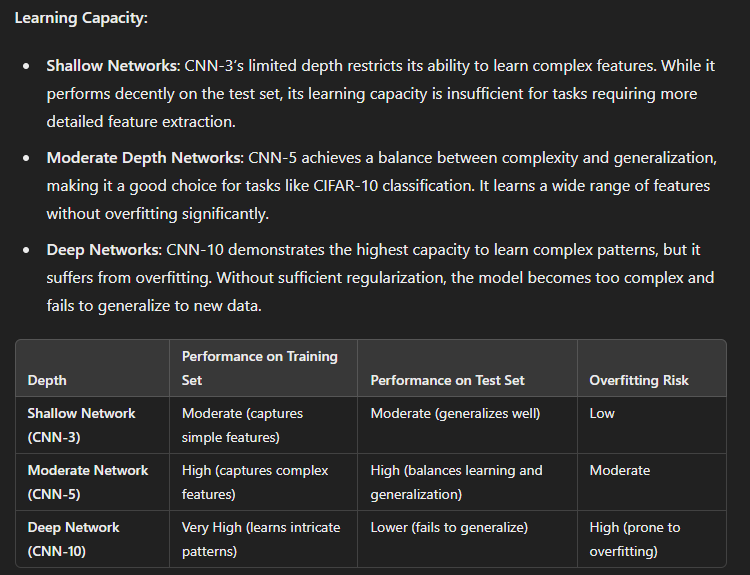

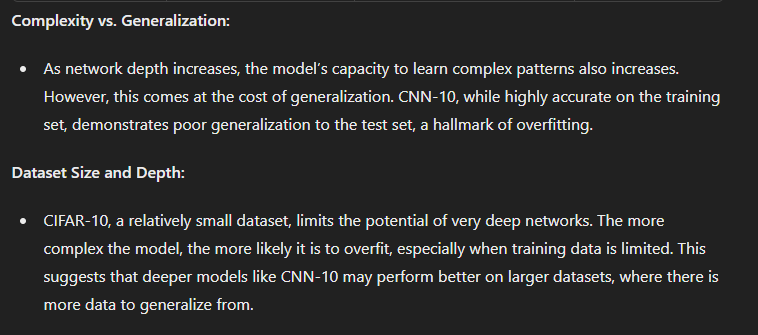

# Section 3: Overfitting with Deeper Models


## 3.1 What Causes Overfitting in Deep CNNs?


Overfitting occurs when a model performs exceptionally well on the training data but poorly on test data or new, unseen data. The model essentially "memorizes" the training data, including noise or irrelevant details, instead of learning to generalize. Deep networks are particularly prone to overfitting due to their increased complexity and capacity to learn intricate patterns.



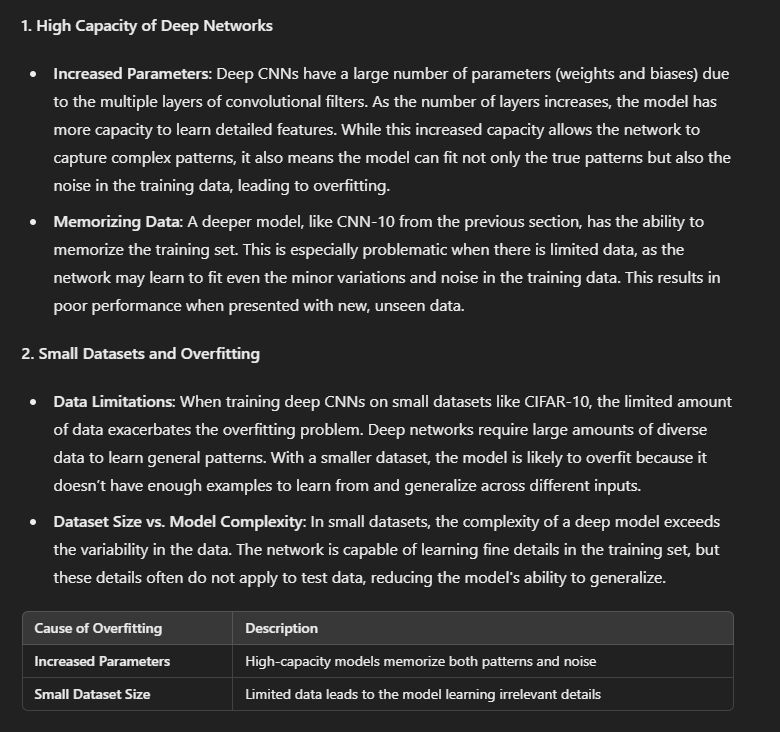

## 3.2 Strategies to Mitigate Overfitting in Deep CNNs


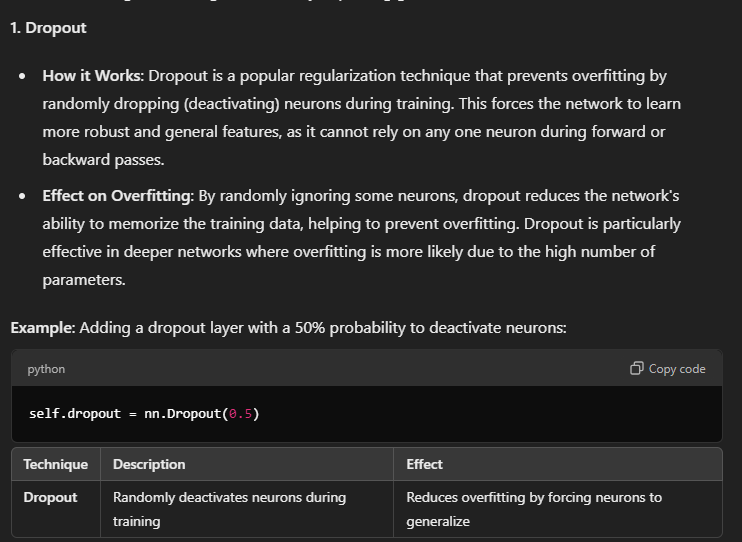

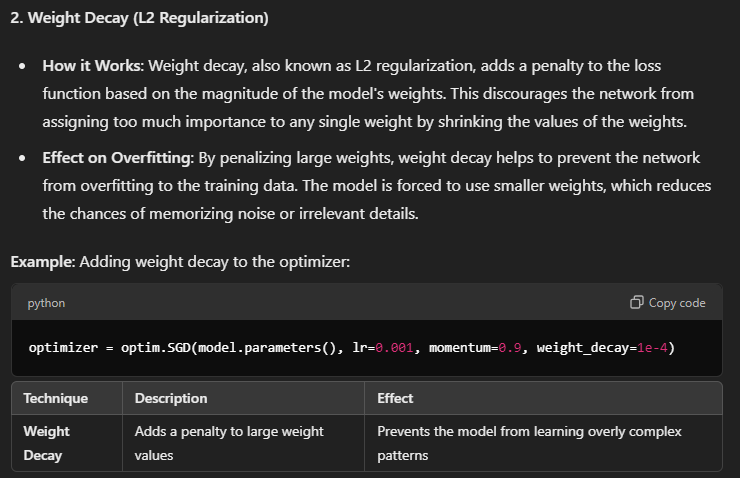

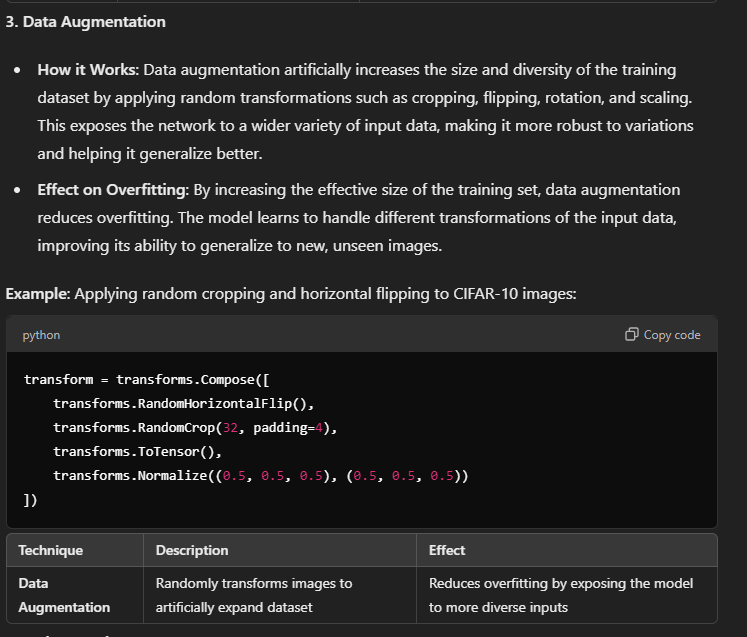

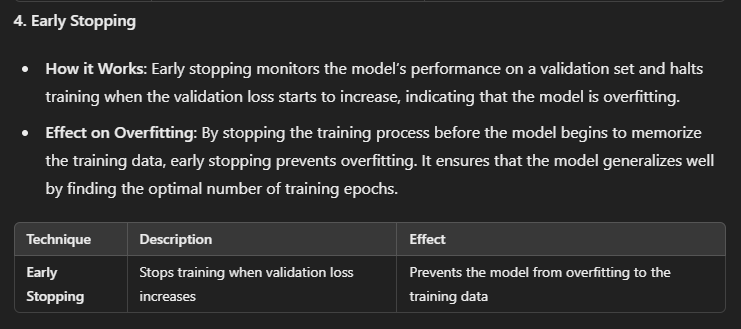

## 3.3 Finding the Right Balance Between Depth and Regularization


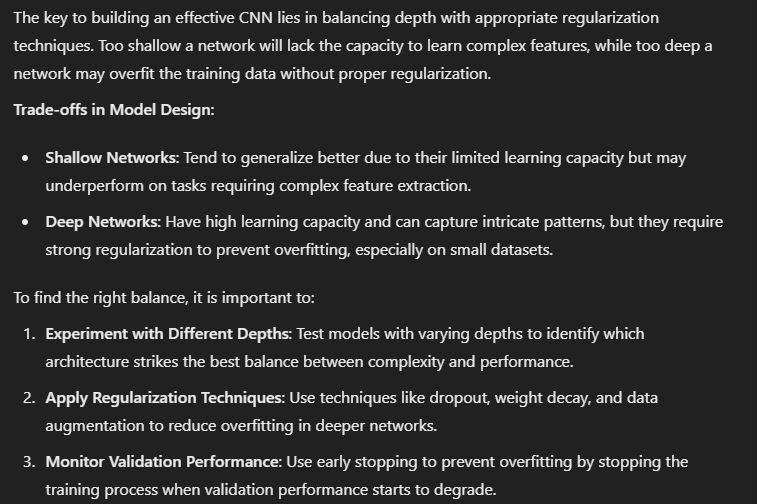

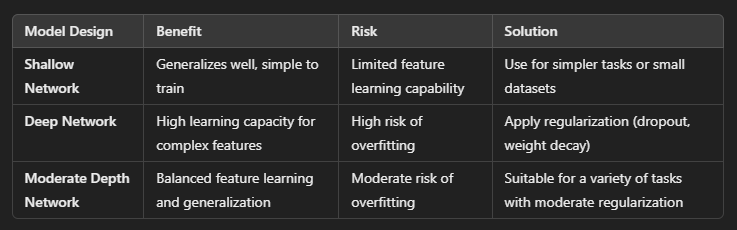